# Bayesian Optimization - CNN

In [1]:
from functions import cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from bayes_opt import BayesianOptimization
import numpy as np

# Load the CIFAR-10 dataset
from functions import load_data
(x_train, x_test, y_train, y_test) = load_data(flatten=0)


In [3]:
cnn = cnn((32,32,3))

In [4]:
# Define the objective function
def objective_function(learning_rate):
    
    cnn.compile(optimizer=Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = cnn.fit(x_train, y_train, verbose=1, validation_data=(x_test, y_test))

    val_acc = history.history['val_accuracy'][-1]
    return val_acc



In [7]:
# Define the search space
pbounds = {'learning_rate': (1e-4, 1e-2)}

# Round 1 Tuning

In [8]:
# Run the optimization
optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | learni... |
-------------------------------------
1563/1563 [==============================] - 158s 100ms/step - loss: 1.2762 - accuracy: 0.5447 - val_loss: 1.0811 - val_accuracy: 0.6063
| 1         | 0.6063    | 0.003808  |
1563/1563 [==============================] - 166s 105ms/step - loss: 1.2410 - accuracy: 0.5709 - val_loss: 1.0275 - val_accuracy: 0.6469
| 2         | 0.6469    | 0.009512  |
1563/1563 [==============================] - 162s 103ms/step - loss: 1.0381 - accuracy: 0.6530 - val_loss: 0.9214 - val_accuracy: 0.6935
| 3         | 0.6935    | 0.007347  |
1563/1563 [==============================] - 174s 111ms/step - loss: 0.9189 - accuracy: 0.6896 - val_loss: 0.7818 - val_accuracy: 0.7297
| 4         | 0.7297    | 0.006027  |
1563/1563 [==============================] - 167s 106ms/step - loss: 0.7329 - accuracy: 0.7501 - val_loss: 0.6807 - val_accuracy: 0.7739
| 5         | 0.7739    | 0.001645  |
1563/1563 [==============================] - 166s

In [9]:
# Print the best hyperparameters and validation accuracy
best_params = optimizer.max['params']
best_val_acc = optimizer.max['target']
print(f'Best hyperparameters: {best_params}')
print(f'Validation accuracy: {best_val_acc:.4f}')

Best hyperparameters: {'learning_rate': 0.00034683209318379243}
Validation accuracy: 0.8033


# Run for round 1 tuned learning rate

In [26]:
from functions import cnn
from functions import train_predict_nn
from tensorflow.keras.utils import plot_model

In [27]:
cnn = cnn((32,32,3))
cnn.compile(optimizer=Adam(learning_rate=0.00034683209318379243),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
1094/1094 [==============================] - 113s 102ms/step - loss: 1.7243 - accuracy: 0.3834 - val_loss: 1.4565 - val_accuracy: 0.4854
Epoch 2/15
1094/1094 [==============================] - 116s 106ms/step - loss: 1.2914 - accuracy: 0.5390 - val_loss: 1.1094 - val_accuracy: 0.6085
Epoch 3/15
1094/1094 [==============================] - 122s 111ms/step - loss: 1.0684 - accuracy: 0.6241 - val_loss: 0.9749 - val_accuracy: 0.6587
Epoch 4/15
1094/1094 [==============================] - 126s 115ms/step - loss: 0.9340 - accuracy: 0.6729 - val_loss: 0.8864 - val_accuracy: 0.6899
Epoch 5/15
1094/1094 [==============================] - 120s 110ms/step - loss: 0.8312 - accuracy: 0.7073 - val_loss: 0.7858 - val_accuracy: 0.7283
Epoch 6/15
1094/1094 [==============================] - 123s 112ms/step - loss: 0.7549 - accuracy: 0.7330 - val_loss: 0.8333 - val_accuracy: 0.7120
Epoch 7/15
1094/1094 [==============================] - 132s 120ms/step - loss: 0.7056 - accuracy: 0.7537 - val_

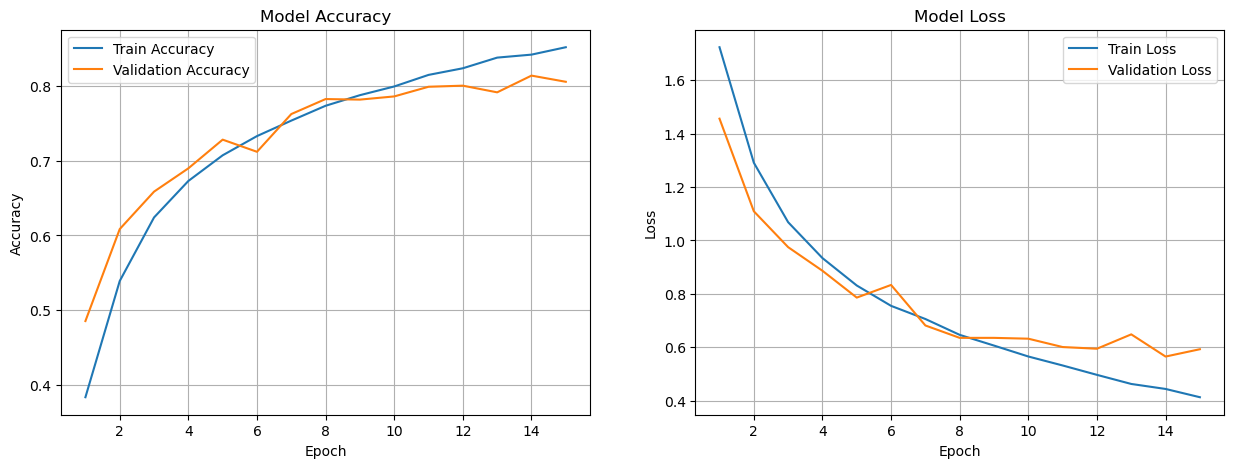

Accuracy Score: 
Train Accuracy Score  :  88.4120%
Test Accuracy Score   :  80.1600%
Training Time         :  1845.4874

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.85      0.79      0.82      1000
  Automobile       0.93      0.86      0.89      1000
        Bird       0.85      0.57      0.68      1000
         Cat       0.59      0.70      0.64      1000
        Deer       0.77      0.81      0.79      1000
         Dog       0.66      0.77      0.72      1000
        Frog       0.85      0.83      0.84      1000
       Horse       0.90      0.83      0.86      1000
        Ship       0.89      0.91      0.90      1000
       Truck       0.82      0.93      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000


Confusion Matrix: 


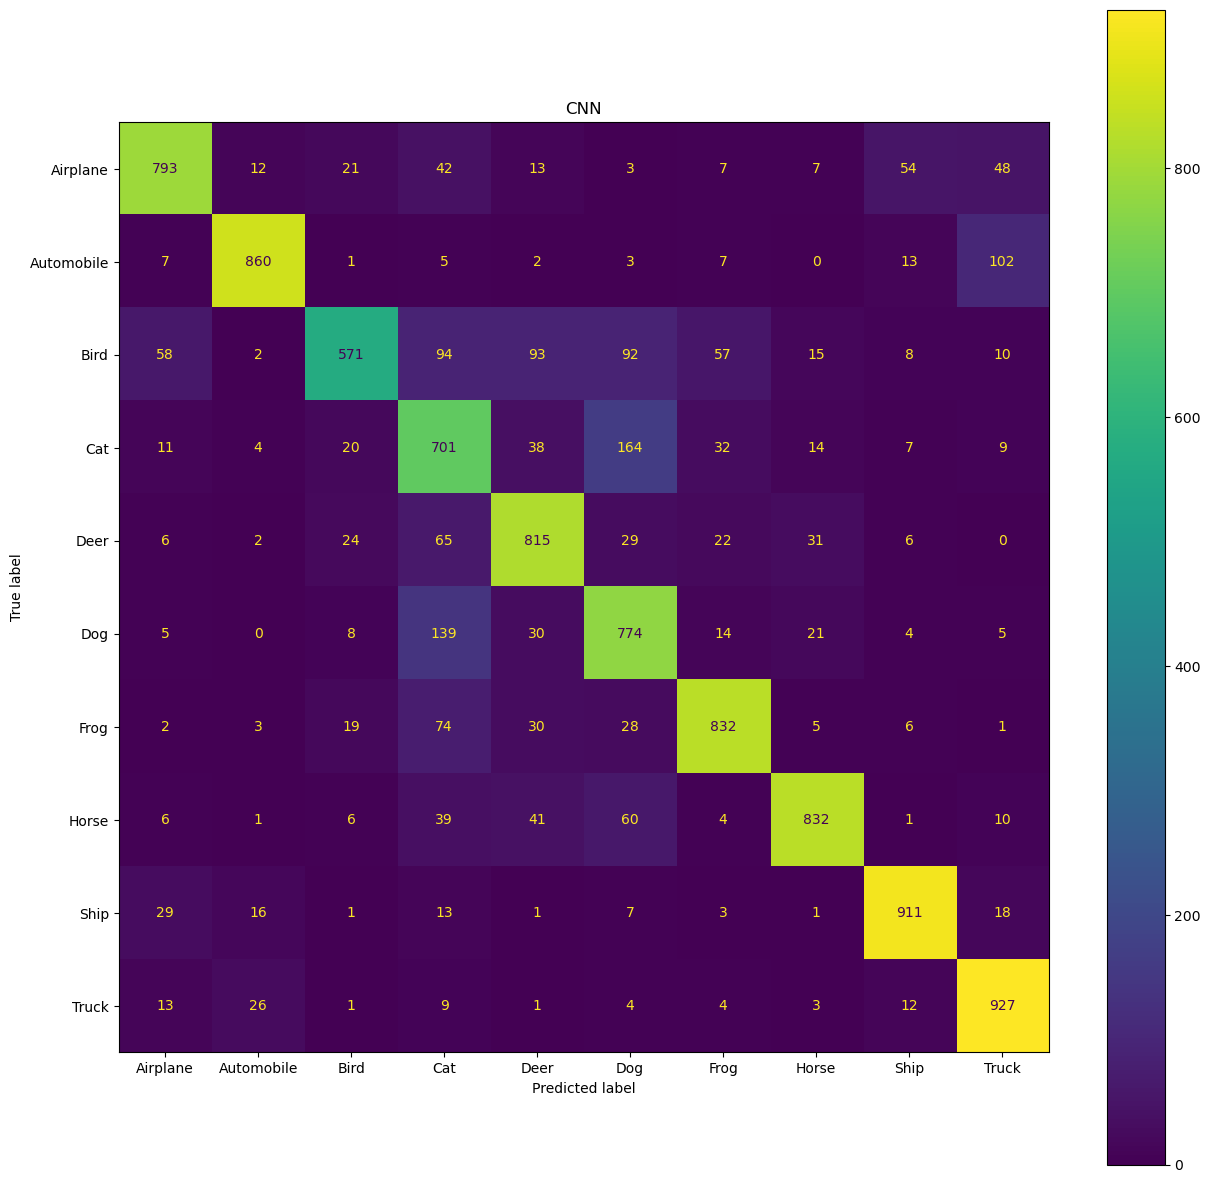

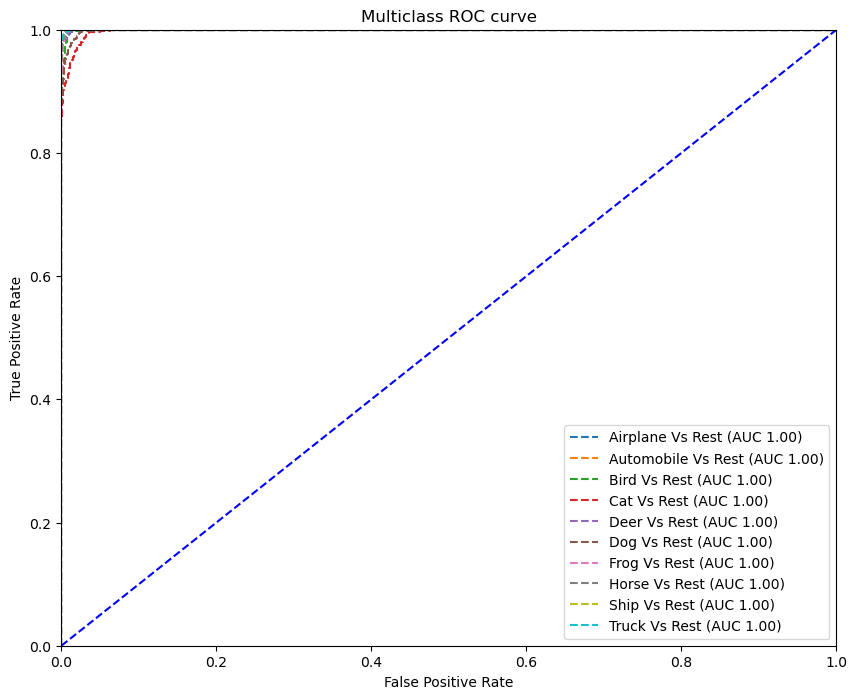


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Dog', 'Automobile', 'Frog', 'Cat', 'Truck']



In [28]:
train_predict_nn(cnn, clf_name="CNN", epochs=15,flatten=0)

In [30]:
# # run another 10 epochs to see will it increasing
# train_predict_nn(cnn, clf_name="CNN", epochs=15,scale=0,flatten=0)

# Round 2 Tuning

In [31]:
# Define the search space
pbounds = {'learning_rate': (1e-5, 1e-4)}

In [17]:
# Run the optimization
optimizer2 = BayesianOptimization(f=objective_function, pbounds=pbounds, random_state=42)
optimizer2.maximize(init_points=5, n_iter=5)

|   iter    |  target   | learni... |
-------------------------------------
1563/1563 [==============================] - 196s 123ms/step - loss: 0.4693 - accuracy: 0.8412 - val_loss: 0.5353 - val_accuracy: 0.8258
| 1         | 0.8258    | 4.371e-05 |
1563/1563 [==============================] - 193s 123ms/step - loss: 0.4433 - accuracy: 0.8484 - val_loss: 0.5302 - val_accuracy: 0.8291
| 2         | 0.8291    | 9.556e-05 |
1563/1563 [==============================] - 188s 120ms/step - loss: 0.4107 - accuracy: 0.8602 - val_loss: 0.5176 - val_accuracy: 0.8318
| 3         | 0.8318    | 7.588e-05 |
1563/1563 [==============================] - 177s 113ms/step - loss: 0.3902 - accuracy: 0.8661 - val_loss: 0.5122 - val_accuracy: 0.8347
| 4         | 0.8347    | 6.388e-05 |
1563/1563 [==============================] - 181s 115ms/step - loss: 0.3676 - accuracy: 0.8726 - val_loss: 0.5050 - val_accuracy: 0.8386
| 5         | 0.8386    | 2.404e-05 |
1563/1563 [==============================] - 175s

In [18]:
# Print the best hyperparameters and validation accuracy
best_params2 = optimizer2.max['params']
best_val_acc2 = optimizer2.max['target']
print(f'Best hyperparameters: {best_params2}')
print(f'Validation accuracy: {best_val_acc2:.4f}')

Best hyperparameters: {'learning_rate': 1.8302752754300172e-05}
Validation accuracy: 0.8425
